# Data Analysis of Chemical reaction time series dataset

In [ ]:
import pandas as pd

# Load the training data CSV file
file_path = "/content/training_data.csv"
df = pd.read_csv(file_path)


In [ ]:
df

,time,y1,y2,y3,y4,y5,y6,y7,y8,y9,...,y45,y46,y47,y48,y49,y50,y51,y52,y53,temperature
0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.195310,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,...,0.0,0.0,0.0,0.783345,0.000000e+00,0.0,0.0,0.0,0.0,1515.000000
1,0.000004,7.533600e-09,5.718574e-09,8.341660e-09,0.195309,1.112636e-08,1.916966e-08,8.298149e-08,1.989069e-10,0.0,...,0.0,0.0,0.0,0.783345,0.000000e+00,0.0,0.0,0.0,0.0,1514.999076
2,0.000008,1.751623e-08,5.693708e-09,1.081556e-08,0.195309,1.754109e-08,6.685755e-08,1.654532e-07,6.837422e-10,0.0,...,0.0,0.0,0.0,0.783345,0.000000e+00,0.0,0.0,0.0,0.0,1514.998190
3,0.000012,2.792153e-08,6.004496e-09,1.225763e-08,0.195309,2.103438e-08,1.267284e-07,2.469054e-07,1.280462e-09,0.0,...,0.0,0.0,0.0,0.783345,0.000000e+00,0.0,0.0,0.0,0.0,1514.997328
4,0.000016,3.922189e-08,6.365011e-09,1.368726e-08,0.195309,2.426660e-08,2.005724e-07,3.273257e-07,1.926908e-09,0.0,...,0.0,0.0,0.0,0.783345,0.000000e+00,0.0,0.0,0.0,0.0,1514.996493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0.001984,7.191182e-05,3.250191e-05,6.013617e-04,0.151869,1.783460e-03,4.167089e-02,1.495778e-06,3.805727e-08,0.0,...,0.0,0.0,0.0,0.782627,3.390762e-10,0.0,0.0,0.0,0.0,1967.707261
497,0.001988,7.161309e-05,3.229776e-05,5.988465e-04,0.151871,1.779873e-03,4.167321e-02,1.493615e-06,3.799352e-08,0.0,...,0.0,0.0,0.0,0.782629,3.390837e-10,0.0,0.0,0.0,0.0,1967.750669
498,0.001992,7.131678e-05,3.209567e-05,5.963517e-04,0.151873,1.776308e-03,4.167551e-02,1.491484e-06,3.791362e-08,0.0,...,0.0,0.0,0.0,0.782632,3.390911e-10,0.0,0.0,0.0,0.0,1967.793758
499,0.001996,7.102283e-05,3.189564e-05,5.938771e-04,0.151875,1.772763e-03,4.167780e-02,1.489385e-06,3.784985e-08,0.0,...,0.0,0.0,0.0,0.782634,3.390985e-10,0.0,0.0,0.0,0.0,1967.836531


In [ ]:
import numpy as np

#Drop non-species columns
species_cols = [col for col in df.columns if col.startswith("y")]
species_data = df[species_cols]

- I have computed the variance of all the components in the dataset. The components which will be evolving throughout the reaction, they are important components of our dataset. And which have negligible variance we will drop them. <br>

<br>

- Similarily, components which change with the rise or drop in temperature are important. Ee compute it with correlation.

In [ ]:
#compute variance of each species
species_variances = species_data.var().sort_values(ascending=False)

#Compute Pearson correlation with temperature
correlations = species_data.corrwith(df["temperature"]).abs().sort_values(ascending=False)

# combine into a DataFrame
importance_df = pd.DataFrame({
    "variance": species_variances,
    "abs_corr_with_temp": correlations
})


In [ ]:
# Sort by combined normalized score for insight
importance_df["normalized_variance"] = (importance_df["variance"] - importance_df["variance"].min()) / (importance_df["variance"].max() - importance_df["variance"].min())
importance_df["normalized_corr"] = (importance_df["abs_corr_with_temp"] - importance_df["abs_corr_with_temp"].min()) / (importance_df["abs_corr_with_temp"].max() - importance_df["abs_corr_with_temp"].min())
importance_df["importance_score"] = importance_df["normalized_variance"] + importance_df["normalized_corr"]

# Sort by overall importance
important_species = importance_df.sort_values("importance_score", ascending=False)
important_species.head(10)

,variance,abs_corr_with_temp,normalized_variance,normalized_corr,importance_score
y4,4.268111e-04,0.982652,1.000000e+00,0.992273,1.992273
y6,3.570629e-04,0.990075,8.365828e-01,0.999795,1.836378
y16,9.525716e-05,0.990277,2.231834e-01,1.000000,1.223183
y14,9.504154e-05,0.978348,2.226782e-01,0.987911,1.210590
y38,1.567975e-13,0.984411,3.673696e-10,0.994055,0.994055
y36,3.832306e-11,0.913360,8.978928e-08,0.922056,0.922056
y37,7.623005e-17,0.862362,1.786037e-13,0.870376,0.870376
y49,3.263875e-20,0.851446,7.644843e-17,0.859315,0.859315
y5,2.856387e-06,0.772541,6.692391e-03,0.779355,0.786048
y31,3.796552e-19,0.660129,8.894930e-16,0.665442,0.665442


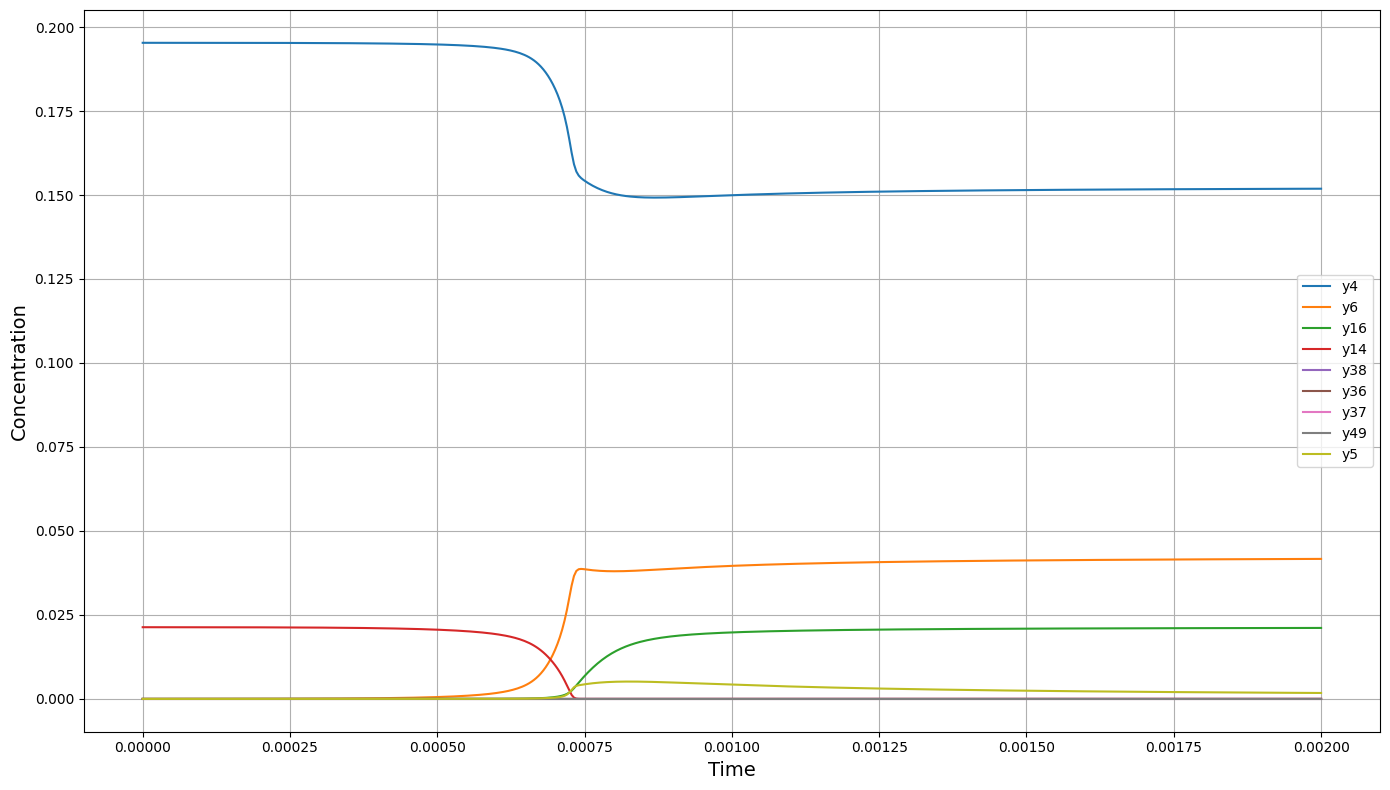

In [ ]:
import matplotlib.pyplot as plt

#visualize the mass concentration
top_species = important_species.head(9).index.tolist()

# Plotting concentration profiles over time
plt.figure(figsize=(14, 8))
for species in top_species:
    plt.plot(df["time"], df[species], label=species)

plt.xlabel("Time", fontsize=14)
plt.ylabel("Concentration", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("species_concentration.pdf", format="pdf", bbox_inches="tight")
plt.show()


In [ ]:
# df2 = df[['time', 'y4', 'y5', 'y6', 'y16', 'y14', 'y38', 'temperature']]

df2 = df[['time', 'y4', 'y6', 'y16', 'y14', 'y38', 'y36',  'temperature']]     # Taking only the main components for the simulation

### Renaming the columns to actual chemical components
This has been done for better interpretability <br>
Reference : [YAML file](https://gist.github.com/speth/c8bfcf0389beba4422a334cc21828692)

In [ ]:
# df2.rename(columns={"y4" : "O2", "y5" : "OH", "y6" : "H2O", "y16" : "CO2", "y14" : "CH4", "y38" : "N2O"})

df2.rename(columns={"y4" : "O2", "y6" : "H2O", "y16" : "CO2", "y14" : "CH4", "y38" : "N2O", "y36":"HCNN"}, inplace = True)

/tmp/ipython-input-23-190448009.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns={"y4" : "O2", "y6" : "H2O", "y16" : "CO2", "y14" : "CH4", "y38" : "N2O", "y36":"HCNN"}, inplace = True)


In [ ]:
df2.to_csv('training_filtered_3.csv', index=False)

### Doing it for test file

In [ ]:
df_test = pd.read_csv('/content/testing_data.csv')
df_test

,time,y1,y2,y3,y4,y5,y6,y7,y8,y9,...,y45,y46,y47,y48,y49,y50,y51,y52,y53,temperature
0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.195795,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,...,0.0,0.0,0.0,0.784270,0.000000e+00,0.0,0.0,0.0,0.0,1515.000000
1,0.000004,6.613656e-09,5.370487e-09,8.180048e-09,0.195795,1.071611e-08,1.749138e-08,7.762343e-08,1.740436e-10,0.0,...,0.0,0.0,0.0,0.784270,0.000000e+00,0.0,0.0,0.0,0.0,1514.999134
2,0.000008,1.548987e-08,5.395348e-09,1.089015e-08,0.195795,1.751623e-08,6.173571e-08,1.549981e-07,5.967205e-10,0.0,...,0.0,0.0,0.0,0.784270,0.000000e+00,0.0,0.0,0.0,0.0,1514.998303
3,0.000012,2.470173e-08,5.693705e-09,1.239438e-08,0.195795,2.114627e-08,1.178025e-07,2.313782e-07,1.118850e-09,0.0,...,0.0,0.0,0.0,0.784269,0.000000e+00,0.0,0.0,0.0,0.0,1514.997496
4,0.000016,3.465948e-08,6.029357e-09,1.383644e-08,0.195795,2.439092e-08,1.864501e-07,3.068756e-07,1.678275e-09,0.0,...,0.0,0.0,0.0,0.784269,0.000000e+00,0.0,0.0,0.0,0.0,1514.996713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0.001984,6.258212e-05,2.911660e-05,5.698631e-04,0.155222,1.625959e-03,3.894649e-02,1.407601e-06,3.679087e-08,0.0,...,0.0,0.0,0.0,0.783610,3.182601e-10,0.0,0.0,0.0,0.0,1939.253633
497,0.001988,6.231304e-05,2.892732e-05,5.673959e-04,0.155224,1.622569e-03,3.894866e-02,1.405021e-06,3.671209e-08,0.0,...,0.0,0.0,0.0,0.783613,3.182669e-10,0.0,0.0,0.0,0.0,1939.295026
498,0.001992,6.204611e-05,2.873998e-05,5.649484e-04,0.155226,1.619198e-03,3.895081e-02,1.402457e-06,3.663329e-08,0.0,...,0.0,0.0,0.0,0.783615,3.182736e-10,0.0,0.0,0.0,0.0,1939.336120
499,0.001996,6.178127e-05,2.855452e-05,5.625204e-04,0.155228,1.615847e-03,3.895296e-02,1.399908e-06,3.655450e-08,0.0,...,0.0,0.0,0.0,0.783617,3.182803e-10,0.0,0.0,0.0,0.0,1939.376917


In [ ]:
#df3 = df_test[['time', 'y4', 'y5', 'y6', 'y16', 'y14', 'y38', 'temperature']]

df3 = df_test[['time', 'y4', 'y6', 'y16', 'y14', 'y38', 'y36',  'temperature']]

In [ ]:
#df3 = df3.rename(columns={"y4" : "O2", "y5" : "OH", "y6" : "H2O", "y16" : "CO2", "y14" : "CH4", "y38" : "N2O"})

df3 = df3.rename(columns={"y4" : "O2", "y6" : "H2O", "y16" : "CO2", "y14" : "CH4", "y38" : "N2O", "y36":"HCNN"})

In [ ]:
df3

,time,O2,H2O,CO2,CH4,N2O,HCNN,temperature
0,0.000000,0.195795,0.000000e+00,0.000000,0.019935,0.000000e+00,0.000000,1515.000000
1,0.000004,0.195795,1.749138e-08,0.000000,0.019935,0.000000e+00,0.000000,1514.999134
2,0.000008,0.195795,6.173571e-08,0.000000,0.019935,0.000000e+00,0.000000,1514.998303
3,0.000012,0.195795,1.178025e-07,0.000000,0.019935,0.000000e+00,0.000000,1514.997496
4,0.000016,0.195795,1.864501e-07,0.000000,0.019934,0.000000e+00,0.000000,1514.996713
...,...,...,...,...,...,...,...,...
496,0.001984,0.155222,3.894649e-02,0.019743,0.000000,7.967005e-07,0.000012,1939.253633
497,0.001988,0.155224,3.894866e-02,0.019744,0.000000,7.953967e-07,0.000012,1939.295026
498,0.001992,0.155226,3.895081e-02,0.019745,0.000000,7.940768e-07,0.000012,1939.336120
499,0.001996,0.155228,3.895296e-02,0.019746,0.000000,7.927726e-07,0.000012,1939.376917


In [ ]:
df3.to_csv('testing_filtered_3.csv', index=False)